# Social graphs and interactions (02805), Project Assignment
###### Group members: Nicole Favero (s244499), Katarina Kraljevic(s243906), and Hubert Wojcik (s243896)

In [1]:
import json
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import community as community_louvain
from collections import Counter
import itertools
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
# Loading the webscrapped data
# Marvel's movies dictionary
with open("../web_scraping/movie_characters_dict.json", "r") as f:
    movie_char_dict = json.load(f)

# Marvel's comics dictionary
with open("../web_scraping/cleaned_comic_characters_dict.json", "r") as f:
    comic_char_dict = json.load(f)

### Creating the Networks

In [3]:
def character_graph(char_dict):
    """
    This functions returns a character graph where characters are connected if they have appeared in the same movie/comic.
    """
    
    G = nx.Graph()

    for node, char in char_dict.items():
        char_names = [i['name'] for i in char]

        # Looping through charcters twice in order to add an edge
        for i, char1 in enumerate(char_names):
            for char2 in char_names[i + 1:]:
                G.add_edge(char1, char2, movie_comic=node)

    return G

# Creating the movie network
G_movie = character_graph(movie_char_dict)

# Creating the comic network
G_comic = character_graph(comic_char_dict)

### Basic Network Analysis

In [4]:
# Checking the webscrapping and getting an idea of the two graphs
print("Movies network:")
components = list(nx.connected_components(G_movie))
print(f"Number of connected components: {len(components)}")
print("Isolated nodes:", list(nx.isolates(G_movie)))
component_sizes = [len(component) for component in components]
print("Sizes of each connected component:", component_sizes)

print("\nComics network:")
components = list(nx.connected_components(G_comic))
print(f"Number of connected components: {len(components)}")
print("Isolated nodes:", list(nx.isolates(G_comic)))
component_sizes = [len(component) for component in components]
print("Sizes of each connected component:", component_sizes)

Movies network:
Number of connected components: 4
Isolated nodes: []
Sizes of each connected component: [159, 13, 13, 5]

Comics network:
Number of connected components: 5
Isolated nodes: []
Sizes of each connected component: [310, 2, 3, 5, 4]


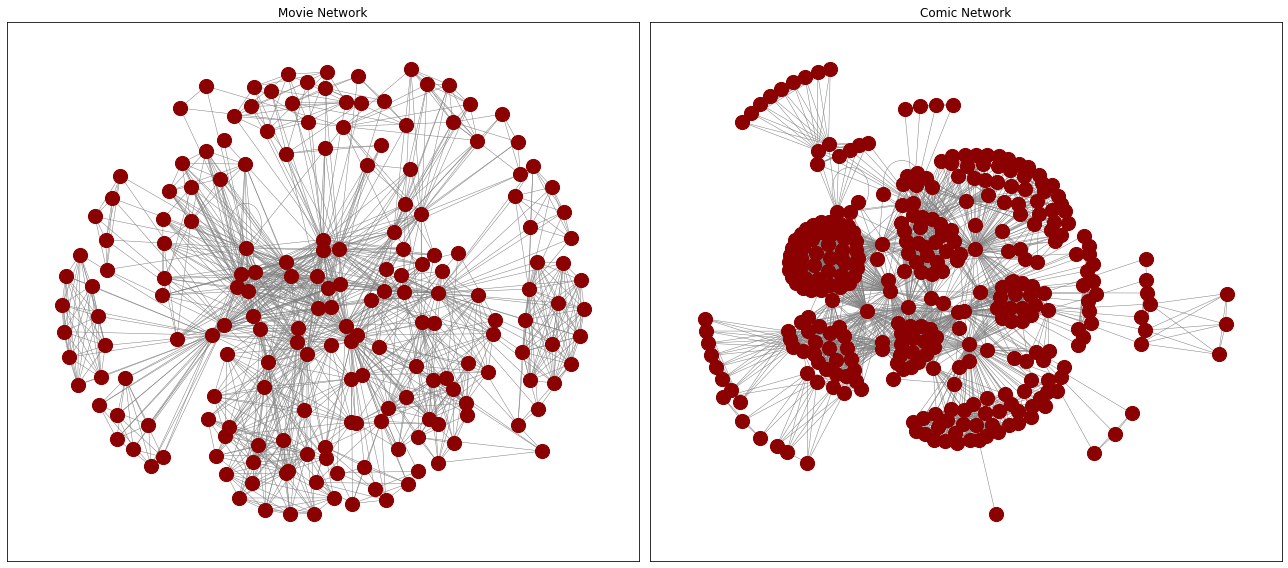

In [5]:
# Visualizing the networks
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

node_size = 200 
edge_color = 'gray'
edge_width = 0.5
node_color = '#8B0000'

# Drawing the movie network
nx.draw_networkx(
    G_movie,
    pos=nx.kamada_kawai_layout(G_movie),
    with_labels=False,
    node_size=node_size,
    width=edge_width,
    edge_color=edge_color,
    node_color=node_color,
    ax=axes[0]
)
axes[0].set_title('Movie Network')

# Drawing the comic network
nx.draw_networkx(
    G_comic,
    pos=nx.kamada_kawai_layout(G_comic),
    with_labels=False,
    node_size=node_size,
    width=edge_width,
    edge_color=edge_color,
    node_color=node_color,
    ax=axes[1]
)
axes[1].set_title('Comic Network')

plt.tight_layout()
plt.show()

In [6]:
def bipartite_graph(char_dict):
    """
    This functions returns a bipartite graphs where characters and movie/comics are both used as nodes, 
    and connected if a character has appeared in a movie/comic.
    """
    
    B = nx.Graph()

    for node, char in char_dict.items():
        # Skipping nodes that have no characters
        if not char:
            continue

        # Adding movie/comic nodes
        B.add_node(node, bipartite=0)

        char_names = [i['name'] for i in char]
        
        # Looping through charcters to add their nodes
        for i, char1 in enumerate(char_names):
            B.add_node(char1, bipartite=1)
            B.add_edge(char1, node)

    return B

In [7]:
B_movie = bipartite_graph(movie_char_dict)

In [8]:
B_movie.edges()

EdgeView([('Iron Man', 'Iron Man (Tony Stark)'), ('Iron Man', 'Obadiah Stane'), ('Iron Man', 'Pepper Potts'), ('Iron Man (Tony Stark)', 'Iron Man 2'), ('Iron Man (Tony Stark)', 'The Avengers'), ('Iron Man (Tony Stark)', 'Iron Man 3'), ('Iron Man (Tony Stark)', 'Avengers: Age of Ultron'), ('Iron Man (Tony Stark)', 'Captain America: Civil War'), ('Iron Man (Tony Stark)', 'Spider-Man: Homecoming'), ('Iron Man (Tony Stark)', 'Avengers: Infinity War'), ('Iron Man (Tony Stark)', 'Avengers: Endgame'), ('Pepper Potts', 'Iron Man 2'), ('Pepper Potts', 'Iron Man 3'), ('The Incredible Hulk', 'Hulk (Bruce Banner)'), ('The Incredible Hulk', 'Betty Ross'), ('The Incredible Hulk', 'Abomination (Emil Blonsky)'), ('The Incredible Hulk', 'Thaddeus Ross'), ('Hulk (Bruce Banner)', 'The Avengers'), ('Hulk (Bruce Banner)', 'Avengers: Age of Ultron'), ('Hulk (Bruce Banner)', 'Thor: Ragnarok'), ('Hulk (Bruce Banner)', 'Avengers: Infinity War'), ('Hulk (Bruce Banner)', 'Avengers: Endgame'), ('Iron Man 2', 'War

In [9]:
B_comic = bipartite_graph(comic_char_dict)

In [10]:
B_comic.edges()

EdgeView([('Avengers: Battle the Earth-Wrecker', 'Captain America (Steve Rogers)'), ('Avengers: Battle the Earth-Wrecker', 'Goliath (Hank Pym)'), ('Avengers: Battle the Earth-Wrecker', 'Hawkeye (Clint Barton)'), ('Avengers: Battle the Earth-Wrecker', 'Wasp (Janet Van Dyne)'), ('Avengers: Battle the Earth-Wrecker', 'Iron Man (Tony Stark)'), ('Captain America (Steve Rogers)', 'Ultimate Super-Villains'), ('Captain America (Steve Rogers)', 'Spider-Man: Revenge of the Sinister Six'), ('Captain America (Steve Rogers)', 'Look & Find Marvel Heroes'), ('Captain America (Steve Rogers)', 'Meet Captain America'), ('Captain America (Steve Rogers)', 'Courageous Captain America: An Origin Story'), ('Captain America (Steve Rogers)', 'The Mighty Avengers: These Are the Avengers'), ('Captain America (Steve Rogers)', 'The Mighty Avengers: The Story of the Avengers'), ('Captain America (Steve Rogers)', 'Avengers: The Kree-Skrull War'), ('Hawkeye (Clint Barton)', 'Look & Find Marvel Heroes'), ('Wasp (Janet

In [11]:
edges_to_remove = [
    edge for edge in B_movie.edges()
    if B_movie.nodes[edge[0]]['bipartite'] == B_movie.nodes[edge[1]]['bipartite']
]

edges_to_remove
# B_movie.remove_edges_from(edges_to_remove)

[('Thor', 'Jane Foster'),
 ('Thor', 'Loki'),
 ('Thor', 'Odin'),
 ('Thor', 'Heimdall'),
 ('Thor', 'Lady Sif'),
 ('Thor', 'Hogun'),
 ('Black Panther', 'Black Panther'),
 ('Black Panther', "Erik Stevens (N'Jadaka)"),
 ('Black Panther', 'Nakia'),
 ('Black Panther', 'Okoye'),
 ('Black Panther', 'Everett Ross'),
 ('Black Panther', "W'Kabi"),
 ('Black Panther', 'Shuri'),
 ('Black Panther', "M'Baku"),
 ('Black Panther', 'Ramonda'),
 ('Black Panther', 'Zuri'),
 ('Black Panther', 'Ulysses Klaue')]

In [12]:
print("Graph is bipartite:", nx.is_bipartite(B_movie))

components = list(nx.connected_components(B_movie))
print(f"Number of connected components: {len(components)}")

isolated_nodes = list(nx.isolates(B_movie))
print("Isolated nodes:", isolated_nodes)

component_sizes = [len(component) for component in components]
print("Sizes of each connected component:", component_sizes)

Graph is bipartite: False
Number of connected components: 4
Isolated nodes: []
Sizes of each connected component: [189, 14, 14, 6]


In [13]:
print("Graph is bipartite:", nx.is_bipartite(B_comic))

components = list(nx.connected_components(B_comic))
print(f"Number of connected components: {len(components)}")

isolated_nodes = list(nx.isolates(B_comic))
print("Isolated nodes:", isolated_nodes)

component_sizes = [len(component) for component in components]
print("Sizes of each connected component:", component_sizes)

Graph is bipartite: True
Number of connected components: 10
Isolated nodes: []
Sizes of each connected component: [395, 3, 2, 2, 2, 4, 6, 2, 2, 5]


In [14]:
top_nodes = {n for n, d in B_movie.nodes(data=True) if d.get("bipartite") == 0}
bottom_nodes = {n for n, d in B_movie.nodes(data=True) if d.get("bipartite") == 1}

print(f"Top nodes (movies/comics): {len(top_nodes)}")
print(f"Bottom nodes (characters): {len(bottom_nodes)}")

Top nodes (movies/comics): 33
Bottom nodes (characters): 190


In [15]:
top_nodes = {n for n, d in B_comic.nodes(data=True) if d.get("bipartite") == 0}
bottom_nodes = {n for n, d in B_comic.nodes(data=True) if d.get("bipartite") == 1}

print(f"Top nodes (comics): {len(top_nodes)}")
print(f"Bottom nodes (characters): {len(bottom_nodes)}")


Top nodes (comics): 94
Bottom nodes (characters): 329


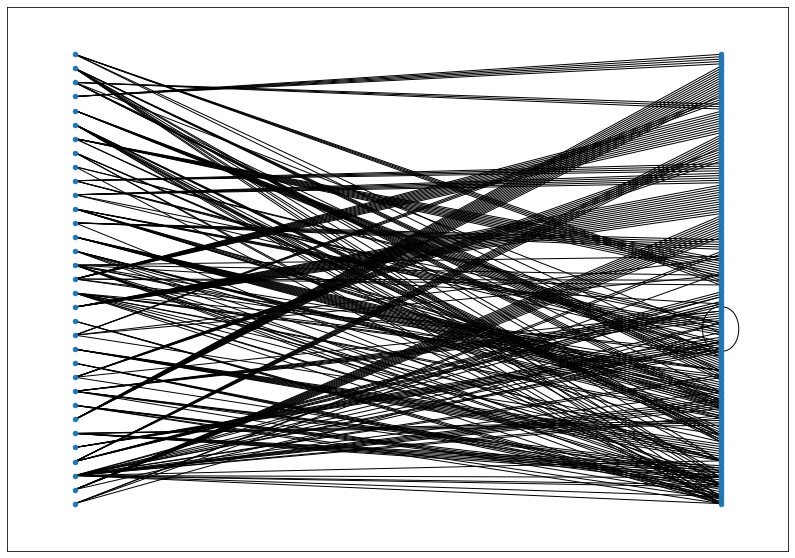

In [16]:
# Get all bipartite sets (and handling the disconnected graph manually)
top_nodes = {n for n, d in B_movie.nodes(data=True) if d.get("bipartite") == 0}

plt.figure(figsize=(14, 10))
nx.draw_networkx(B_movie, pos=nx.bipartite_layout(B_movie, nodes=top_nodes), with_labels=False, node_size=20)


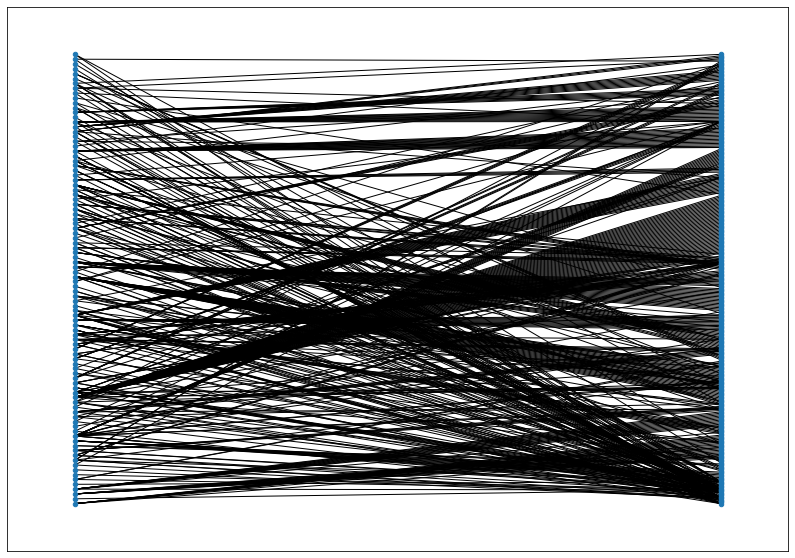

In [17]:
# Get all bipartite sets (and handling the disconnected graph manually)
top_nodes = {n for n, d in B_comic.nodes(data=True) if d.get("bipartite") == 0}

plt.figure(figsize=(14, 10))
nx.draw_networkx(B_comic, pos=nx.bipartite_layout(B_comic, nodes=top_nodes), with_labels=False, node_size=20)


In [18]:
deg_centrality_movie = dict(sorted(nx.degree_centrality(G_movie).items(), key=lambda item: item[1], reverse=True))
deg_centrality_comic = dict(sorted(nx.degree_centrality(G_comic).items(), key=lambda item: item[1], reverse=True))

print('Degree centrality of the movie network:', deg_centrality_movie)
print('Degree centrality of the comic network:', deg_centrality_comic)

Degree centrality of the movie network: {'Thor': 0.26455026455026454, 'Hulk (Bruce Banner)': 0.2222222222222222, 'Black Widow (Natasha Romanoff)': 0.2222222222222222, 'Captain America (Steve Rogers)': 0.21693121693121692, 'Iron Man (Tony Stark)': 0.21164021164021163, 'Wong': 0.21164021164021163, 'Okoye': 0.20634920634920634, 'Ant-Man (Hank Pym)': 0.20105820105820105, 'Nebula': 0.19576719576719576, 'Shuri': 0.19047619047619047, 'Doctor Strange (Stephen Strange)': 0.18518518518518517, 'Star-Lord (Peter Quill)': 0.17989417989417988, 'Gamora': 0.17989417989417988, 'Drax the Destroyer': 0.17989417989417988, 'Rocket': 0.17989417989417988, 'Spider-Man (Peter Parker)': 0.1746031746031746, 'Black Panther': 0.1693121693121693, 'Groot': 0.164021164021164, 'War Machine (Rhodey Rhodes)': 0.15343915343915343, 'Mantis': 0.15343915343915343, 'Nick Fury': 0.14814814814814814, 'Winter Soldier (Bucky Barnes)': 0.14285714285714285, 'Falcon (Sam Wilson)': 0.14285714285714285, 'Wanda Maximoff': 0.1428571428

In [19]:
def analyze_graph(G):
    """
    Perform network analysis on the graph.
    """
    N = G.number_of_nodes()
    L = G.number_of_edges()
    avg_degree = float(L) / N if N > 0 else 0
    
    degrees = [degree for _, degree in G.degree()]
    k_min = np.min(degrees)
    k_max = np.max(degrees)

    avg_clustering_coeff = nx.average_clustering(G)

    deg_centrality = sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)

    ############################

    print(f"Number of Nodes: {N}")
    print(f"Number of Edges: {L}")
    print(f"Average Degree: {avg_degree:.2f}")
    
    print(f"Minimum Degree: {k_min}")
    print(f"Maximum Degree: {k_max}")
    
    # if nx.is_connected(G):
    #     avg_short_path = nx.average_shortest_path_length(G)
    #     print(f"Average Shortest Path Length: {avg_short_path:.2f}")
    # else:
    #     print("Graph is not connected. Average Shortest Path Length cannot be computed.")

    print(f"Average Clustering Coefficient: {avg_clustering_coeff:.2f}")

    print("\nDegree Centrality (top 10):")
    for node, degree in deg_centrality[:10]:
        print(f"{node}: {degree:.2f}")



In [20]:
analyze_graph(G_movie)

Number of Nodes: 190
Number of Edges: 1205
Average Degree: 6.34
Minimum Degree: 2
Maximum Degree: 50
Average Clustering Coefficient: 0.90

Degree Centrality (top 10):
Thor: 0.26
Hulk (Bruce Banner): 0.22
Black Widow (Natasha Romanoff): 0.22
Captain America (Steve Rogers): 0.22
Iron Man (Tony Stark): 0.21
Wong: 0.21
Okoye: 0.21
Ant-Man (Hank Pym): 0.20
Nebula: 0.20
Shuri: 0.19


In [21]:
analyze_graph(G_comic)

Number of Nodes: 324
Number of Edges: 3184
Average Degree: 9.83
Minimum Degree: 1
Maximum Degree: 104
Average Clustering Coefficient: 0.90

Degree Centrality (top 10):
Spider-Man (Peter Parker): 0.32
Galactus: 0.30
Iron Man (Tony Stark): 0.29
Doctor Doom: 0.28
Ben Urich: 0.24
Avengers: 0.22
Bolivar Trask: 0.21
Captain America (Steve Rogers): 0.17
Cyclops (Scott Summers): 0.17
Hulk (Bruce Banner): 0.16


The comic network, 337 nodesand 3275 edges, is a lot bigger than the movie network which has 191 nodes and 1205 edges. Comics have much more characters and storylines which is expected (and good for our goal of predicting the future)

We also have very high clustering coefficients of 0.9, which aligns the visualization of the networks - characters that appear together form comunities.

The degree centrality top 10 char definitly make sense, they are popular charcters that have often collaborate (at least in movies). The comic centrality shows other characters as well, such as cyclops, dr doom or similar, this is because the comics have a more narrative.


In [22]:
def analyze_gcc(G):
    """
    Perform network analysis on the Largest Connected Component (GCC) of the graph.
    """

    # Extract the Largest Connected Component (GCC)
    if nx.is_connected(G):
        GCC = G
    else:
        gcc = max(nx.connected_components(G), key=len)
        GCC = G.subgraph(gcc).copy()

    # Values for GCC analysis
    N = GCC.number_of_nodes()
    L = GCC.number_of_edges()
    density = nx.density(GCC)
    betweenness_centrality = sorted(nx.betweenness_centrality(GCC).items(), key=lambda item: item[1], reverse=True)
    avg_short_path = nx.average_shortest_path_length(GCC) if nx.is_connected(GCC) else None
    eccentricity = nx.eccentricity(GCC) if nx.is_connected(GCC) else None
    max_eccentricity = max(eccentricity.values()) if eccentricity else None
    diameter = nx.diameter(GCC) if nx.is_connected(GCC) else None

    ############################

    print(f"Largest Connected Component (GCC) Analysis:")
    print(f"Number of Nodes in GCC: {N}")
    print(f"Number of Edges in GCC: {L}")
    print(f"Density of GCC: {density:.4f}")

    print("\nBetweenness Centrality (top 10 nodes):")
    for node, centrality in betweenness_centrality[:10]:
        print(f"{node}: {centrality:.4f}")

    if avg_short_path is not None:
        print(f"\nAverage Shortest Path Length in GCC: {avg_short_path:.2f}")
    else:
        print("\nAverage Shortest Path Length cannot be computed (GCC not connected).")

    if max_eccentricity is not None:
        print(f"Maximum Eccentricity in GCC: {max_eccentricity}")
    else:
        print("Eccentricity cannot be computed (GCC not connected).")

    if diameter is not None:
        print(f"Diameter of GCC: {diameter}")
    else:
        print("Diameter cannot be computed (GCC not connected).")


In [23]:
analyze_gcc(G_movie)

Largest Connected Component (GCC) Analysis:
Number of Nodes in GCC: 159
Number of Edges in GCC: 1039
Density of GCC: 0.0827

Betweenness Centrality (top 10 nodes):
Ant-Man (Hank Pym): 0.2359
Thor: 0.1707
Wong: 0.1629
Captain America (Steve Rogers): 0.1057
Black Widow (Natasha Romanoff): 0.0947
Hulk (Bruce Banner): 0.0888
Okoye: 0.0862
Iron Man (Tony Stark): 0.0829
Doctor Strange (Stephen Strange): 0.0737
Carol Danvers (Captain Marvel): 0.0646

Average Shortest Path Length in GCC: 2.60
Maximum Eccentricity in GCC: 4
Diameter of GCC: 4


In [24]:
analyze_gcc(G_comic)

Largest Connected Component (GCC) Analysis:
Number of Nodes in GCC: 310
Number of Edges in GCC: 3161
Density of GCC: 0.0660

Betweenness Centrality (top 10 nodes):
Spider-Man (Peter Parker): 0.2889
Iron Man (Tony Stark): 0.2495
Doctor Doom: 0.1779
Hulk (Bruce Banner): 0.1264
Galactus: 0.1133
Avengers: 0.0966
Wolverine (Logan): 0.0794
Ben Urich: 0.0664
Loki: 0.0539
Cyclops (Scott Summers): 0.0467

Average Shortest Path Length in GCC: 2.71
Maximum Eccentricity in GCC: 6
Diameter of GCC: 6


The GCC of movies is denser than comics, showing that movie characters frequently co-appear in ensembles, while comic characters are spread across more diverse stories. Scott Lang/Ant-Man and Thor in the movies network, and Spider-Man and Iron Man in the comics, play central roles in connecting their respective networks. The shorter diameter and path length in movies reflect a more tightly connected character network compared to comics.

In [25]:
analyze_graph(B_movie)

Number of Nodes: 223
Number of Edges: 306
Average Degree: 1.37
Minimum Degree: 1
Maximum Degree: 23
Average Clustering Coefficient: 0.02

Degree Centrality (top 10):
Avengers: Infinity War: 0.10
Black Panther: 0.06
Ant-Man and the Wasp: Quantumania: 0.06
Thor: 0.06
Eternals: 0.06
Deadpool & Wolverine: 0.06
Guardians of the Galaxy: 0.05
Avengers: Endgame: 0.05
Black Panther: Wakanda Forever: 0.05
Avengers: Age of Ultron: 0.05


In [26]:
analyze_graph(B_comic)

Number of Nodes: 423
Number of Edges: 532
Average Degree: 1.26
Minimum Degree: 1
Maximum Degree: 48
Average Clustering Coefficient: 0.00

Degree Centrality (top 10):
X-Men: Watchers on the Walls: 0.11
Ultimate Super-Villains: 0.06
Spider-Man (Peter Parker): 0.06
Iron Man (Tony Stark): 0.06
X-Men/Red Skull: The Chaos Engine: 0.06
Spider-Man: Drowned in Thunder: 0.05
Look & Find Marvel Heroes: 0.05
Hulk (Bruce Banner): 0.04
Iron Man (novel): 0.04
Iron Man: Armored Adventures - High-Tech Hero: 0.03


In [27]:
# Distinguish between movies and characters in the bipartial graph
# For movies (bipartite=0)
top_movies = sorted([(node, centrality) for node, centrality in nx.degree_centrality(B_movie).items() if B_movie.nodes[node].get("bipartite") == 0], key=lambda x: x[1], reverse=True)

# For characters (bipartite=1)
top_characters = sorted([(node, centrality) for node, centrality in nx.degree_centrality(B_movie).items() if B_movie.nodes[node].get("bipartite") == 1], key=lambda x: x[1], reverse=True)

print("Top 10 Movies with the Most Characters:")
for movie, centrality in top_movies[:10]:
    print(f"{movie}: {centrality:.2f}")

print("\nTop 10 Characters in the Most Movies:")
for character, centrality in top_characters[:10]:
    print(f"{character}: {centrality:.2f}")

Top 10 Movies with the Most Characters:
Avengers: Infinity War: 0.10
Ant-Man and the Wasp: Quantumania: 0.06
Eternals: 0.06
Deadpool & Wolverine: 0.06
Guardians of the Galaxy: 0.05
Avengers: Endgame: 0.05
Black Panther: Wakanda Forever: 0.05
Avengers: Age of Ultron: 0.05
Captain America: Civil War: 0.05
Shang-Chi and the Legend of the Ten Rings: 0.05

Top 10 Characters in the Most Movies:
Black Panther: 0.06
Thor: 0.06
Iron Man (Tony Stark): 0.04
Black Widow (Natasha Romanoff): 0.04
Captain America (Steve Rogers): 0.03
Hulk (Bruce Banner): 0.03
Nick Fury: 0.02
Nebula: 0.02
Ant-Man (Hank Pym): 0.02
War Machine (Rhodey Rhodes): 0.02


In [28]:
# Distinguish between comics and characters in the bipartial graph
# For comics (bipartite=0)
top_comics = sorted([(node, centrality) for node, centrality in nx.degree_centrality(B_comic).items() if B_comic.nodes[node].get("bipartite") == 0], key=lambda x: x[1], reverse=True)

# For characters (bipartite=1)
top_characters = sorted([(node, centrality) for node, centrality in nx.degree_centrality(B_comic).items() if B_comic.nodes[node].get("bipartite") == 1], key=lambda x: x[1], reverse=True)

print("Top 10 Comics with the Most Characters:")
for movie, centrality in top_comics[:10]:
    print(f"{movie}: {centrality:.2f}")

print("\nTop 10 Characters in the Most Comics:")
for character, centrality in top_characters[:10]:
    print(f"{character}: {centrality:.2f}")


Top 10 Comics with the Most Characters:
X-Men: Watchers on the Walls: 0.11
Ultimate Super-Villains: 0.06
X-Men/Red Skull: The Chaos Engine: 0.06
Spider-Man: Drowned in Thunder: 0.05
Look & Find Marvel Heroes: 0.05
Iron Man (novel): 0.04
Iron Man: Armored Adventures - High-Tech Hero: 0.03
Spider-Man: Carnage in New York: 0.03
Spider-Man: Goblin Moon: 0.03
X-Men: Enter The X-Men: 0.03

Top 10 Characters in the Most Comics:
Spider-Man (Peter Parker): 0.06
Iron Man (Tony Stark): 0.06
Hulk (Bruce Banner): 0.04
Earth-904913: 0.02
Captain America (Steve Rogers): 0.02
Mr. Fantastic (Reed Richards): 0.02
Human Torch (Johnny Storm): 0.02
Invisible Woman (Susan Storm): 0.02
The Thing (Ben Grimm): 0.02
J. Jonah Jameson: 0.02


Compared to before, the bipartite networks have a larger number of nodes and clustering coeff of 0 (because there no connections between nodes of the same type).

Another difference is that the average degrees are low now, 1.36 and 1.24, which would again indicate sparse connections

For the movies, Avengersr stand out, while for the comics, the X-men series and and various Spider-Man and Iron Man comics (which are earlier movies - so maybe picked as the most famous comics?).

In terms of characters Thor and Tony Stark dominate in terms of appearances across multiple movies, while for comics, Iron Man, Spider-Man, and Hulk emerge as the most connected.

In [29]:
analyze_gcc(B_movie)

Largest Connected Component (GCC) Analysis:
Number of Nodes in GCC: 189
Number of Edges in GCC: 275
Density of GCC: 0.0155

Betweenness Centrality (top 10 nodes):
Avengers: Infinity War: 0.4781
Avengers: Endgame: 0.2547
Ant-Man (Hank Pym): 0.2278
Thor: 0.1994
Wong: 0.1560
Ant-Man and the Wasp: Quantumania: 0.1168
Iron Man (Tony Stark): 0.1112
Captain America (Steve Rogers): 0.1084
Shang-Chi and the Legend of the Ten Rings: 0.1038
Black Widow (Natasha Romanoff): 0.1018

Average Shortest Path Length in GCC: 4.78
Maximum Eccentricity in GCC: 8
Diameter of GCC: 8


In [30]:
analyze_gcc(B_comic)

Largest Connected Component (GCC) Analysis:
Number of Nodes in GCC: 395
Number of Edges in GCC: 513
Density of GCC: 0.0066

Betweenness Centrality (top 10 nodes):
Spider-Man (Peter Parker): 0.3264
Iron Man (Tony Stark): 0.2889
Ultimate Super-Villains: 0.2576
X-Men: Watchers on the Walls: 0.2421
Look & Find Marvel Heroes: 0.2280
Hulk Saves the Day: 0.1958
Doctor Doom: 0.1717
Hulk (Bruce Banner): 0.1666
X-Men/Red Skull: The Chaos Engine: 0.1417
Spider-Man: Drowned in Thunder: 0.1390

Average Shortest Path Length in GCC: 5.21
Maximum Eccentricity in GCC: 13
Diameter of GCC: 13


The GCC of movies network is denser than comics network, reflecting stronger character-to-movie connections in films compared to the more distributed connections in comics. Avengers: Infinity War and Avengers: Endgame dominate the b_movies network, emphasizing their central role in uniting characters, while in b_comics, books like Ultimate Super-Villains and X-Men: Watchers on the Walls play a similar centralizing role. The larger diameter and average path length in b_comics suggest a more sprawling and less cohesive structure compared to the tighter connections in b_movies.

# Communities

In [31]:
# Louvain on the entire graph
def apply_louvain(G):
    # Apply Louvain method
    partition = community_louvain.best_partition(G)
    
    modularity = community_louvain.modularity(partition, G)

    # Print results
    num_communities = len(set(partition.values()))
    print(f"Number of communities detected: {num_communities}")
    print(f"Modularity: {modularity:.4f}")
    
    
    # Visualize the communities
    pos = nx.spring_layout(G)  # Node positions for visualization
    plt.figure(figsize=(10, 7))
    nx.draw(
        G, pos, 
        node_color=[partition[node] for node in G.nodes()],
        with_labels=False, 
        node_size=30, 
        cmap=plt.cm.tab20
    )
    plt.title("Louvain Communities")
    plt.show()

    return partition

Number of communities detected: 8
Modularity: 0.5875


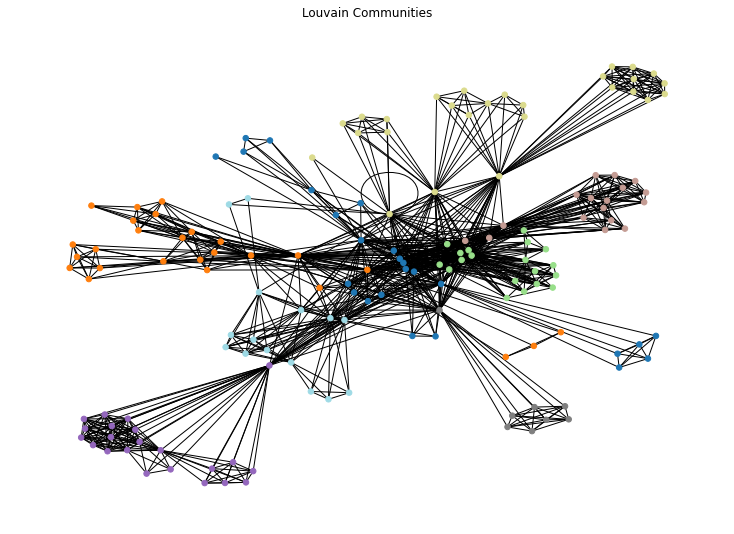

In [ ]:
# For the GCC 
gcc_movie = max(nx.connected_components(G_movie), key=len)
GCC_movie = G_movie.subgraph(gcc_movie).copy()
partition_gcc_movie = apply_louvain(GCC_movie) 

Number of communities detected: 7
Modularity: 0.6548


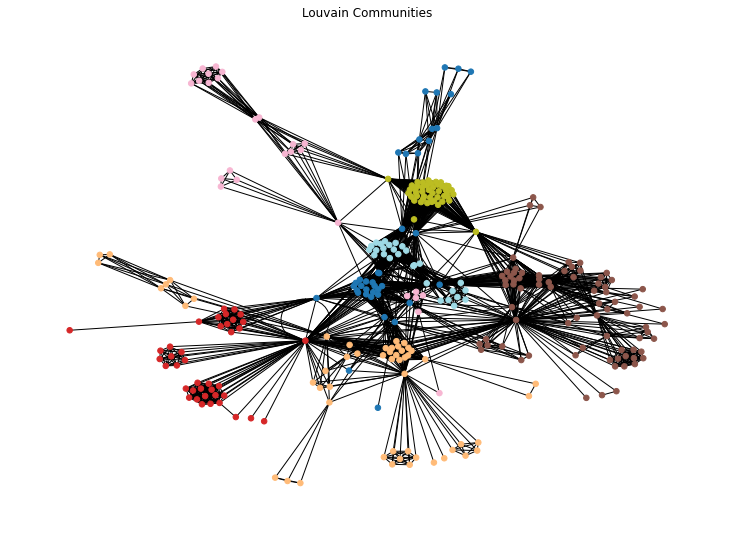

In [33]:
# For the GCC
gcc_comic = max(nx.connected_components(G_comic), key=len)
GCC_comic = G_comic.subgraph(gcc_comic).copy()
partition_gcc_comic = apply_louvain(GCC_comic) 

Modularity values of 0.5888 for movies and 0.6719 for comics suggest that both networks have a strong community structure, but the community in the comics network is slightly more defined than in the movies network

In [34]:
def plot_community_sizes_and_interconnectivity(G, partition):
    # Count nodes in each community
    community_sizes = Counter(partition.values())
    
    # Sort communities by size in descending order (by y-values)
    sorted_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)
    sorted_ids, sorted_sizes = zip(*sorted_communities)
    
    # Calculate inter-community connectivity
    interconnectivity = {comm: 0 for comm in community_sizes.keys()}
    for node1, node2 in G.edges():
        comm1 = partition[node1]
        comm2 = partition[node2]
        if comm1 != comm2:  # Edge connects nodes in different communities
            interconnectivity[comm1] += 1
            interconnectivity[comm2] += 1

    # Sort interconnectivity in the same order as community sizes
    sorted_interconnectivity = [interconnectivity[comm] for comm in sorted_ids]
    
    # Plot community size distribution
    plt.figure(figsize=(14, 5))

    # Subplot 1: Community sizes
    plt.subplot(1, 2, 1)
    plt.bar(range(len(sorted_ids)), sorted_sizes, tick_label=sorted_ids, width=0.8)
    plt.title("Community Size Distribution")
    plt.xlabel("Community ID")
    plt.ylabel("Number of Nodes")
    plt.xticks(rotation=45)

    # Subplot 2: Inter-community edges
    plt.subplot(1, 2, 2)
    plt.bar(range(len(sorted_ids)), sorted_interconnectivity, tick_label=sorted_ids, width=0.8, color="orange")
    plt.title("Inter-Community Edge Distribution")
    plt.xlabel("Community ID")
    plt.ylabel("Number of Inter-Community Edges")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
    
    # Print community sizes and interconnectivity
    print("Community Sizes and Interconnectivity:")
    for i, comm in enumerate(sorted_ids):
        print(f"Community {comm}: {sorted_sizes[i]} nodes, {sorted_interconnectivity[i]} inter-community edges")



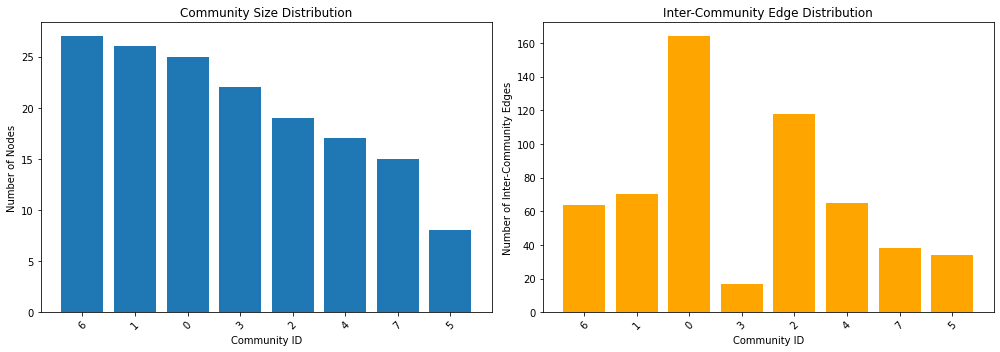

Community Sizes and Interconnectivity:
Community 6: 27 nodes, 64 inter-community edges
Community 1: 26 nodes, 70 inter-community edges
Community 0: 25 nodes, 164 inter-community edges
Community 3: 22 nodes, 17 inter-community edges
Community 2: 19 nodes, 118 inter-community edges
Community 4: 17 nodes, 65 inter-community edges
Community 7: 15 nodes, 38 inter-community edges
Community 5: 8 nodes, 34 inter-community edges


In [35]:
plot_community_sizes_and_interconnectivity(GCC_movie, partition_gcc_movie)


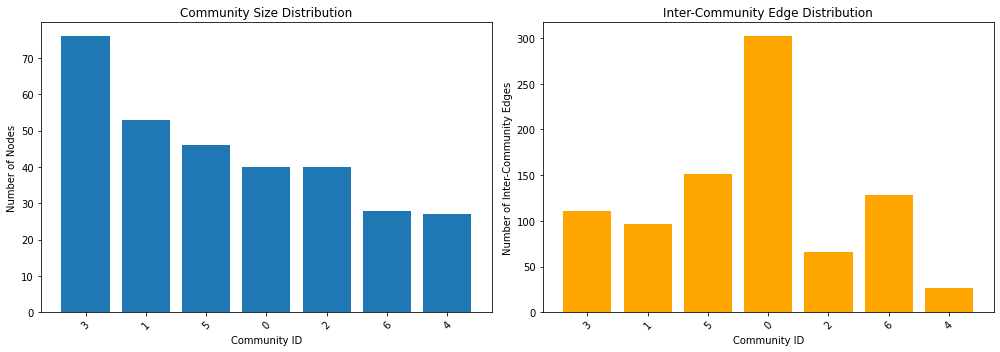

Community Sizes and Interconnectivity:
Community 3: 76 nodes, 111 inter-community edges
Community 1: 53 nodes, 97 inter-community edges
Community 5: 46 nodes, 151 inter-community edges
Community 0: 40 nodes, 302 inter-community edges
Community 2: 40 nodes, 66 inter-community edges
Community 6: 28 nodes, 128 inter-community edges
Community 4: 27 nodes, 27 inter-community edges


In [36]:
plot_community_sizes_and_interconnectivity(GCC_comic, partition_gcc_comic)

In [37]:
def plot_inter_community_graph(G, partition):
    # Create a new graph where each node is a community
    community_graph = nx.Graph()
    community_sizes = Counter(partition.values())
    for node1, node2 in G.edges():
        comm1 = partition[node1]
        comm2 = partition[node2]
        if comm1 != comm2:
            if community_graph.has_edge(comm1, comm2):
                community_graph[comm1][comm2]['weight'] += 1
            else:
                community_graph.add_edge(comm1, comm2, weight=1)

    # Node sizes based on community sizes
    max_size = max(community_sizes.values()) if community_sizes else 1
    node_sizes = [(community_sizes[comm] / max_size) * 3000 for comm in community_graph.nodes()]

    # Extract edge weights and scale for thickness
    edges, weights = zip(*nx.get_edge_attributes(community_graph, 'weight').items())
    max_weight = max(weights) if weights else 1  # Avoid division by zero
    normalized_weights = [weight / max_weight * 5 for weight in weights]  # Scale thickness (adjust factor as needed)

    
    # Plot the community-level graph with edge weights
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(community_graph)
    nx.draw(
        community_graph, pos, 
        with_labels=True, 
        node_size=node_sizes, 
        font_size=10, 
        node_color='lightblue', 
        edge_color='gray',
        width=normalized_weights
    )
 
    plt.title("Inter-Community Graph with Node Sizes")
    plt.show()


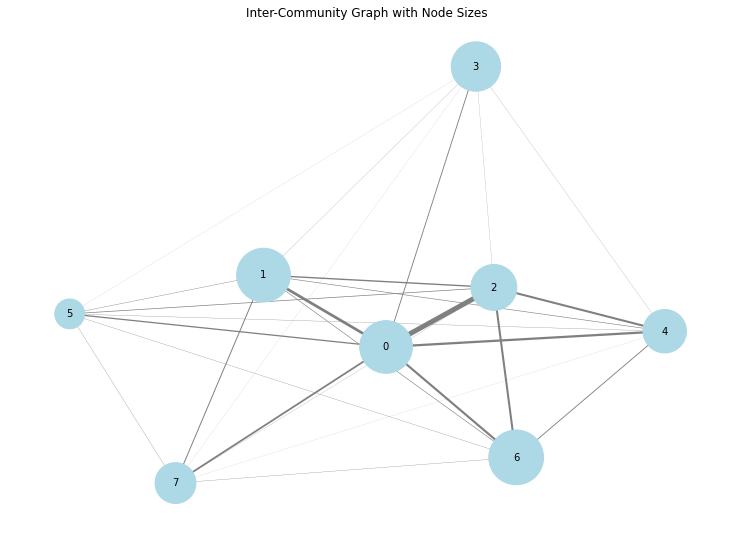

In [38]:
plot_inter_community_graph(GCC_movie, partition_gcc_movie)

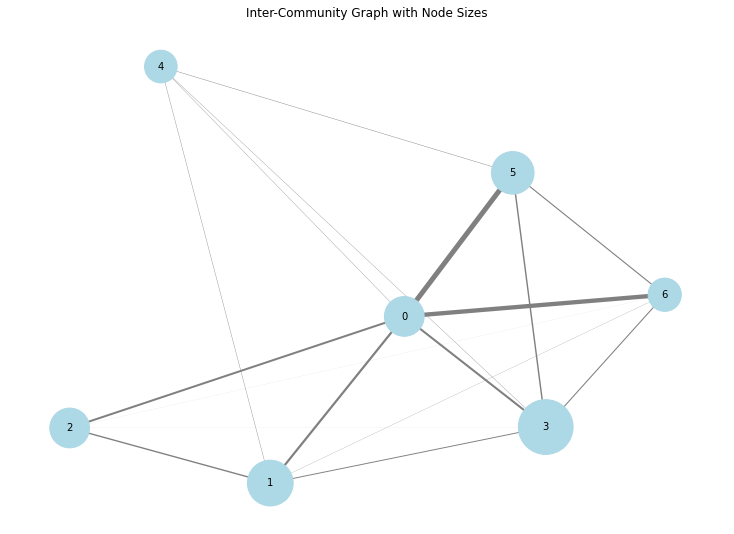

In [39]:
plot_inter_community_graph(GCC_comic, partition_gcc_comic)

From the histogram and nodes plot, we observe no strong correlation between the size of a community and its connections to others. In the movie network, Community 3 stands out with the highest number of inter-community edges, forming strong connections with Communities 6 and 0, while Community 1 is the most isolated. In the comic network, although Community 2 is the largest, Community 6 has the highest connectivity, especially with Communities 5 and 7, while Community 1 remains the most isolated.

In [40]:
# Name of the communities members

def print_top_nodes_by_community(G, partition, communities_to_analyze, top_n=5):
    """
    Print the top N nodes (by degree) for specified communities.

    Parameters:
    - G: The graph (NetworkX object)
    - partition: The community partition dictionary (node -> community)
    - communities_to_analyze: List of community IDs to analyze
    - top_n: Number of top nodes to return for each community
    """
    for community in communities_to_analyze:
        # Get all nodes in the specified community
        community_nodes = [node for node, comm in partition.items() if comm == community]
        
        # Get the degrees of nodes in this community
        community_degrees = {node: G.degree(node) for node in community_nodes}
        
        # Sort nodes by degree in descending order
        sorted_nodes = sorted(community_degrees.items(), key=lambda x: x[1], reverse=True)
        
        # Get the top N nodes
        top_nodes = sorted_nodes[:top_n]
        
        # Print the results
        print(f"Top {top_n} nodes by degree in Community {community}:")
        for node, degree in top_nodes:
            print(f"  {node}")
        print()  # Blank line for better readability

# Communities to analyze for GCC movie
movie_communities = [0, 1, 2, 3, 4, 5, 6, 7]
print("Top nodes for GCC Movie:")
print_top_nodes_by_community(GCC_movie, partition_gcc_movie, movie_communities)

# Communities to analyze for GCC comic
comic_communities = [0, 1, 2, 3, 4, 5, 6]
print("Top nodes for GCC Comic:")
print_top_nodes_by_community(GCC_comic, partition_gcc_comic, comic_communities)


Top nodes for GCC Movie:
Top 5 nodes by degree in Community 0:
  Black Widow (Natasha Romanoff)
  Iron Man (Tony Stark)
  War Machine (Rhodey Rhodes)
  Winter Soldier (Bucky Barnes)
  Falcon (Sam Wilson)

Top 5 nodes by degree in Community 1:
  Thor
  Hulk (Bruce Banner)
  Loki
  Odin
  Heimdall

Top 5 nodes by degree in Community 2:
  Nebula
  Star-Lord (Peter Quill)
  Gamora
  Drax the Destroyer
  Rocket

Top 5 nodes by degree in Community 3:
  Ant-Man (Hank Pym)
  Hank Pym
  Wasp
  Janet van Dyne
  Kang the Conqueror

Top 5 nodes by degree in Community 4:
  Okoye
  Shuri
  Black Panther
  Nakia
  Everett Ross

Top 5 nodes by degree in Community 5:
  Captain America (Steve Rogers)
  Chester Phillips
  Red Skull (Johann Shmidt)
  Peggy Carter
  Bucky Barnes

Top 5 nodes by degree in Community 6:
  Wong
  Doctor Strange (Stephen Strange)
  Spider-Man (Peter Parker)
  Shang-Chi
  Katy Chen

Top 5 nodes by degree in Community 7:
  Nick Fury
  Carol Danvers (Captain Marvel)
  Phil Coulson

In [41]:
node_A = 'Spider-Man (Peter Parker)'
node_B = 'Wolverine'

# Find all simple paths between the two nodes
all_paths = nx.all_simple_paths(G_movie, source=node_A, target=node_B)


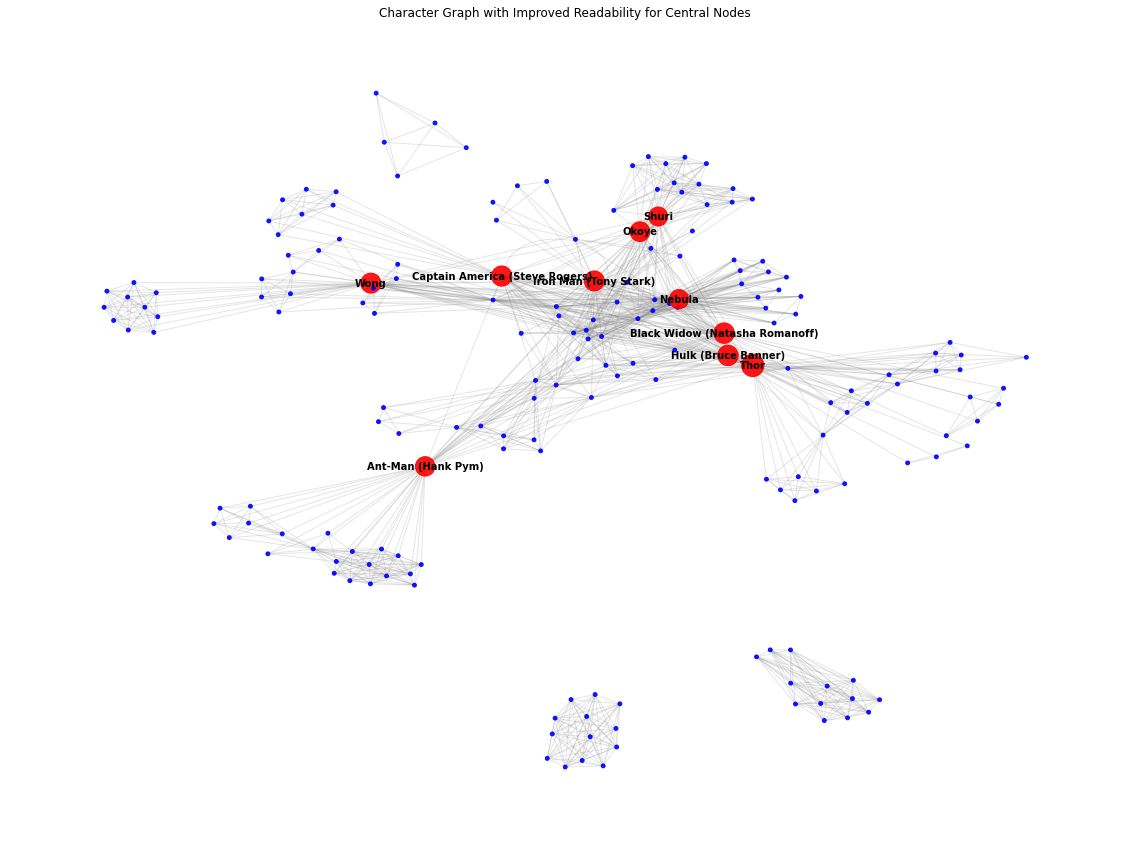

In [42]:
# Get the degrees of all nodes
node_degrees = dict(G_movie.degree())

# Find the top 10 most connected nodes
top_10_nodes = sorted(node_degrees, key=node_degrees.get, reverse=True)[:10]

# Set node sizes and labels
node_sizes = [node_degrees[node] * 10 if node in top_10_nodes else 15 for node in G_movie.nodes()]
node_labels = {node: node if node in top_10_nodes else "" for node in G_movie.nodes()}

# Adjusted visualization for better readability of crowded nodes
plt.figure(figsize=(20, 15))

# Generate initial positions using spring layout with higher repulsion
pos = nx.spring_layout(G_movie, k=0.5, iterations=100)

# Slightly nudge the positions of the top nodes to reduce overlap
for i, node in enumerate(top_10_nodes):
    pos[node] = np.array([pos[node][0] * 1.3, pos[node][1] * 1.3])

# Draw nodes with adjusted sizes
nx.draw_networkx_nodes(
    G_movie, pos, 
    node_size=node_sizes, 
    alpha=0.9, 
    node_color=["red" if node in top_10_nodes else "blue" for node in G_movie.nodes()]
)

# Draw edges
nx.draw_networkx_edges(G_movie, pos, alpha=0.2, edge_color="gray")

# Draw labels for the top 10 nodes
nx.draw_networkx_labels(
    G_movie, pos, labels=node_labels, 
    font_size=10, font_color="black", font_weight="bold"
)

plt.title("Character Graph with Improved Readability for Central Nodes")
plt.axis("off")
plt.show()

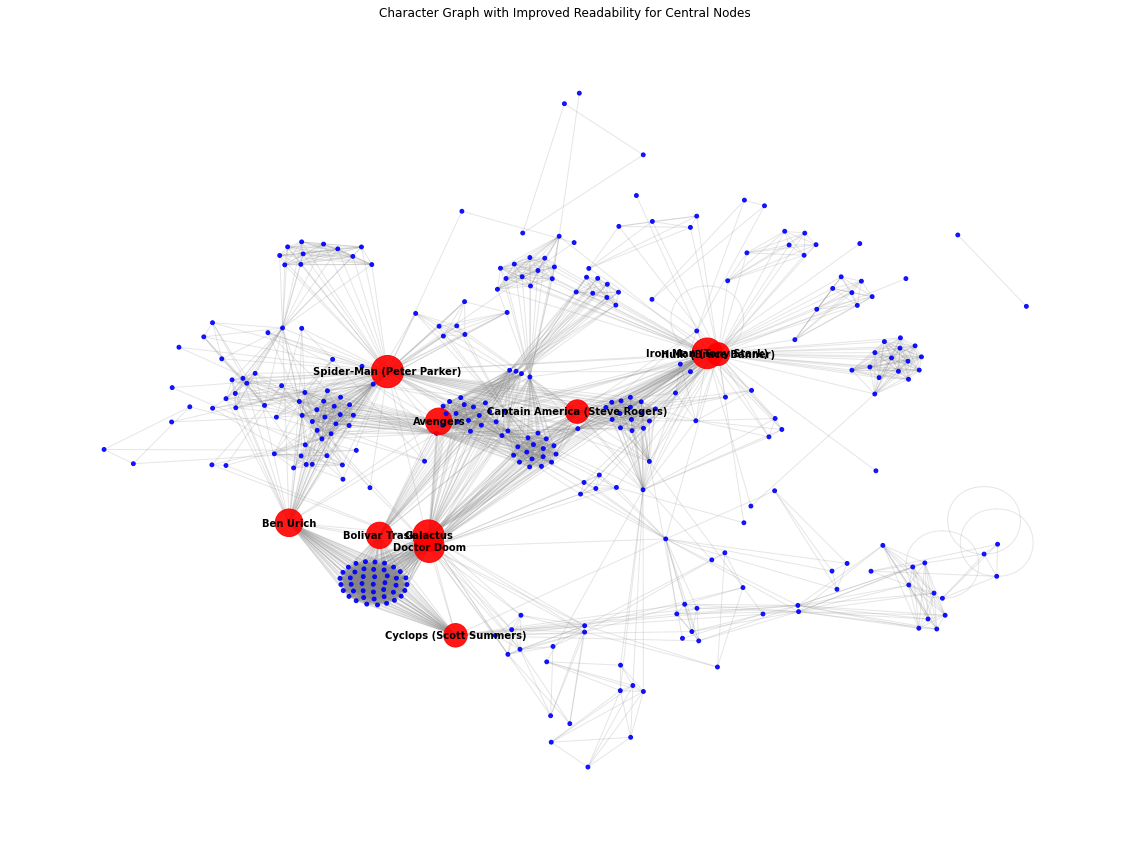

In [43]:
# Get the degrees of all nodes
node_degrees = dict(G_comic.degree())

# Find the top 10 most connected nodes
top_10_nodes = sorted(node_degrees, key=node_degrees.get, reverse=True)[:10]

# Set node sizes and labels
node_sizes = [node_degrees[node] * 10 if node in top_10_nodes else 15 for node in G_comic.nodes()]
node_labels = {node: node if node in top_10_nodes else "" for node in G_comic.nodes()}

# Adjusted visualization for better readability of crowded nodes
plt.figure(figsize=(20, 15))

# Generate initial positions using spring layout with higher repulsion
pos = nx.spring_layout(G_comic, k=0.5, iterations=100)

# Slightly nudge the positions of the top nodes to reduce overlap
for i, node in enumerate(top_10_nodes):
    pos[node] = np.array([pos[node][0] * 1.3, pos[node][1] * 1.3])

# Draw nodes with adjusted sizes
nx.draw_networkx_nodes(
    G_comic, pos, 
    node_size=node_sizes, 
    alpha=0.9, 
    node_color=["red" if node in top_10_nodes else "blue" for node in G_comic.nodes()]
)

# Draw edges
nx.draw_networkx_edges(G_comic, pos, alpha=0.2, edge_color="gray")

# Draw labels for the top 10 nodes
nx.draw_networkx_labels(
    G_comic, pos, labels=node_labels, 
    font_size=10, font_color="black", font_weight="bold"
)

plt.title("Character Graph with Improved Readability for Central Nodes")
plt.axis("off")
plt.show()

In [44]:
# node_A = 'Peter Parker/Spider-Man'
# node_B = 'Wolverine'

# # Find all simple paths between the two nodes
# all_paths = nx.all_simple_paths(G_movie, source=node_A, target=node_B)

# # Counter to give each file a unique name
# counter = 0

# # Draw each path
# for path in all_paths:
#     # Create a subgraph containing only the nodes and edges of the current path
#     H = G_movie.subgraph(path)

#     # Calculate layout for the subgraph
#     pos = nx.kamada_kawai_layout(H, scale=20)

#     plt.figure(figsize=(12, 10))
#     plt.axis("off")
#     nx.draw_networkx_nodes(H, pos, node_size=100, node_color="red")
#     nx.draw_networkx_edges(H, pos, edge_color="black", width=0.5)
#     nx.draw_networkx_labels(H, pos, font_color='blue', font_size=8)

#     # # Save the plot to a file
#     # filename = f"path_{counter}.png"
#     # plt.savefig(filename)

#     # Optionally, show the plot
#     plt.show()

#     counter += 1
    
#     # Break the loop after displaying 10 paths
#     if counter >= 10:
#         break

In [45]:
# Function to find the top 20 nodes by degree centrality
def get_top_20_nodes(graph):
    degree_centrality = nx.degree_centrality(graph)
    # Sort nodes by degree centrality in descending order and pick top 20
    sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
    return sorted_nodes

# Get top 20 nodes for both graphs
top_20_movie = get_top_20_nodes(G_movie)
top_20_comics = get_top_20_nodes(G_comic)

In [46]:

def create_table_subplot_degree(top_nodes, ax, title):
    # Create a pandas DataFrame for the top nodes and degree centrality
    df = pd.DataFrame(top_nodes, columns=['Node', 'Degree Centrality'])
    
    # Round degree centrality values to 4 decimal places
    df['Degree Centrality'] = df['Degree Centrality'].round(4)
    
    # Normalize the degree centrality values for color scaling
    min_val = df['Degree Centrality'].min()
    max_val = df['Degree Centrality'].max()
    norm = Normalize(vmin=min_val, vmax=max_val)
    
    # Color code the degree centrality, but not the node names
    def color_code(val):
        # Custom color scheme based on normalized degree centrality value
        color = plt.cm.cividis(norm(val))  # Using 'cividis' colormap
        return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}); color: white'
    
    # Apply color coding only to the 'Degree Centrality' column
    df_styled = df.style.applymap(color_code, subset=['Degree Centrality'])
    
    # Render the table on the given axis (ax)
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colLoc='center')
    
    # Customize table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    
    # Bold the first row (header) manually
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # First row (header)
            cell.set_fontsize(14)
            cell.set_text_props(weight='bold')  # Make header bold
            cell.set_facecolor((1, 1, 1, 0))  # Ensure header background is transparent (RGBA)
        if j == 0:  # First column (node names)
            cell.set_facecolor((1, 1, 1, 0))  # Set the first column background to transparent

    # Apply background color to cells for degree centrality manually
    for i, row in enumerate(df.values):
        for j, value in enumerate(row):
            if j == 1:  # Apply color to the 'Degree Centrality' column only
                color = plt.cm.cividis(norm(df['Degree Centrality'][i]))  # Get the color for each cell
                table[(i+1, j)].set_facecolor(color)
                table[(i+1, j)].set_text_props(color='white')
    
    # Remove the table outline by setting lines to transparent
    for key, cell in table.get_celld().items():
        cell.set_edgecolor("none")
    
    # Set title for the subplot
    ax.set_title(title, fontsize=16)

    # Ensure the figure background is transparent
    ax.axis('off')  # Hide axes

# Function to get top 20 nodes by degree centrality
def get_top_20_nodes_by_degree(graph):
    degree_centrality = nx.degree_centrality(graph)
    # Sort nodes by degree centrality in descending order and pick top 20
    sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
    return sorted_nodes

# Get top 20 nodes for both graphs based on degree centrality
top_20_movie_degree = get_top_20_nodes_by_degree(G_movie)
top_20_comics_degree = get_top_20_nodes_by_degree(G_comic)

# Create subplots (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create and place the tables on the subplots
create_table_subplot_degree(top_20_movie_degree, ax1, "Top 20 Movie Nodes")
create_table_subplot_degree(top_20_comics_degree, ax2, "Top 20 Comics Nodes")

# Save the combined figure as an image
image_filename_degree = "top_20_nodes_degree_table.png"
plt.tight_layout()  # Adjust the layout
plt.savefig(image_filename_degree, bbox_inches='tight', dpi=300)
plt.close()

print(f"Combined degree centrality table saved as {image_filename_degree}")

Combined degree centrality table saved as top_20_nodes_degree_table.png


In [47]:
def create_table_subplot_betweenness(top_nodes, ax, title):
    # Create a pandas DataFrame for the top nodes and betweenness centrality
    df = pd.DataFrame(top_nodes, columns=['Node', 'Betweenness Centrality'])
    
    # Round betweenness centrality values to 4 decimal places
    df['Betweenness Centrality'] = df['Betweenness Centrality'].round(4)
    
    # Normalize the betweenness centrality values for color scaling
    min_val = df['Betweenness Centrality'].min()
    max_val = df['Betweenness Centrality'].max()
    norm = Normalize(vmin=min_val, vmax=max_val)
    
    # Color code the betweenness centrality, but not the node names
    def color_code(val):
        # Custom color scheme based on normalized betweenness centrality value
        color = plt.cm.cividis(norm(val))  # Using 'cividis' colormap
        return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}); color: white'
    
    # Apply color coding only to the 'Betweenness Centrality' column
    df_styled = df.style.applymap(color_code, subset=['Betweenness Centrality'])
    
    # Render the table on the given axis (ax)
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colLoc='center')
    
    # Customize table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    
    # Bold the first row (header) manually
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # First row (header)
            cell.set_fontsize(14)
            cell.set_text_props(weight='bold')  # Make header bold
            cell.set_facecolor((1, 1, 1, 0))  # Ensure header background is transparent (RGBA)
        if j == 0:  # First column (node names)
            cell.set_facecolor((1, 1, 1, 0))  # Set the first column background to transparent

    # Apply background color to cells for betweenness centrality manually
    for i, row in enumerate(df.values):
        for j, value in enumerate(row):
            if j == 1:  # Apply color to the 'Betweenness Centrality' column only
                color = plt.cm.cividis(norm(df['Betweenness Centrality'][i]))  # Get the color for each cell
                table[(i+1, j)].set_facecolor(color)
                table[(i+1, j)].set_text_props(color='white')
    
    # Remove the table outline by setting lines to transparent
    for key, cell in table.get_celld().items():
        cell.set_edgecolor("none")
    
    # Set title for the subplot
    ax.set_title(title, fontsize=16)

    # Ensure the figure background is transparent
    ax.axis('off')  # Hide axes

# Function to get top 20 nodes by betweenness centrality
def get_top_20_nodes_by_betweenness(graph):
    betweenness_centrality = nx.betweenness_centrality(graph)
    # Sort nodes by betweenness centrality in descending order and pick top 20
    sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
    return sorted_nodes

# Get top 20 nodes for both graphs based on betweenness centrality
top_20_movie_betweenness = get_top_20_nodes_by_betweenness(G_movie)
top_20_comics_betweenness = get_top_20_nodes_by_betweenness(G_comic)

# Create subplots (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create and place the tables on the subplots
create_table_subplot_betweenness(top_20_movie_betweenness, ax1, "Top 20 Movie Nodes")
create_table_subplot_betweenness(top_20_comics_betweenness, ax2, "Top 20 Comics Nodes")

# Save the combined figure as an image
image_filename_betweenness = "top_20_nodes_betweenness_table.png"
plt.tight_layout()  # Adjust the layout
plt.savefig(image_filename_betweenness, bbox_inches='tight', dpi=300)
plt.close()

print(f"Combined betweenness centrality table saved as {image_filename_betweenness}")

Combined betweenness centrality table saved as top_20_nodes_betweenness_table.png


In [48]:

# Function to create a custom color-coded DataFrame for the top nodes
def create_table_subplot(top_nodes, ax, title):
    # Create a pandas DataFrame for the top nodes and closeness centrality
    df = pd.DataFrame(top_nodes, columns=['Node', 'Closeness Centrality'])
    
    # Round closeness centrality values to 4 decimal places
    df['Closeness Centrality'] = df['Closeness Centrality'].round(4)
    
    # Normalize the closeness centrality values for color scaling
    min_val = df['Closeness Centrality'].min()
    max_val = df['Closeness Centrality'].max()
    norm = Normalize(vmin=min_val, vmax=max_val)
    
    # Color code the closeness centrality, but not the node names
    def color_code(val):
        # Custom color scheme based on normalized closeness centrality value
        color = plt.cm.cividis(norm(val))  # Using 'twilight' colormap
        return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}); color: white'
    
    # Apply color coding only to the 'Closeness Centrality' column
    df_styled = df.style.applymap(color_code, subset=['Closeness Centrality'])
    
    # Render the table on the given axis (ax)
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colLoc='center')
    
    # Customize table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    
    # Bold the first row (header) manually
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # First row (header)
            cell.set_fontsize(14)
            cell.set_text_props(weight='bold')  # Make header bold
            cell.set_facecolor((1, 1, 1, 0))  # Ensure header background is transparent (RGBA)
        if j == 0:  # First column (node names)
            cell.set_facecolor((1, 1, 1, 0))  # Set the first column background to transparent

    # Apply background color to cells for closeness centrality manually
    for i, row in enumerate(df.values):
        for j, value in enumerate(row):
            if j == 1:  # Apply color to the 'Closeness Centrality' column only
                color = plt.cm.cividis(norm(df['Closeness Centrality'][i]))  # Get the color for each cell
                table[(i+1, j)].set_facecolor(color)
                table[(i+1, j)].set_text_props(color='white')
    
    # Remove the table outline by setting lines to transparent
    for key, cell in table.get_celld().items():
        cell.set_edgecolor("none")
    
    # Set title for the subplot
    ax.set_title(title, fontsize=16)

    # Ensure the figure background is transparent
    ax.axis('off')  # Hide axes

# Function to get top 20 nodes by closeness centrality
def get_top_20_nodes_by_closeness(graph):
    closeness_centrality = nx.closeness_centrality(graph)
    # Sort nodes by closeness centrality in descending order and pick top 20
    sorted_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
    return sorted_nodes

# Get top 20 nodes for both graphs based on closeness centrality
top_20_movie = get_top_20_nodes_by_closeness(G_movie)
top_20_comics = get_top_20_nodes_by_closeness(G_comic)

# Create subplots (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create and place the tables on the subplots
create_table_subplot(top_20_movie, ax1, "Top 20 Movie Nodes")
create_table_subplot(top_20_comics, ax2, "Top 20 Comics Nodes")

# Save the combined figure as an image
image_filename = "top_20_nodes_closeness_table.png"
plt.tight_layout()  # Adjust the layout
plt.savefig(image_filename, bbox_inches='tight', dpi=300)
plt.close()

print(f"Combined table saved as {image_filename}")

Combined table saved as top_20_nodes_closeness_table.png


In [49]:
def cross_network_predictions(G_movie, G_comic):
    predictions = []
    for node1, node2 in G_comic.edges():
        # If the pair exists in the comic network but not in the movie network
        if G_movie.has_node(node1) and G_movie.has_node(node2) and not G_movie.has_edge(node1, node2):
            # Compute common neighbors in the comic network
            neighbors1 = set(G_comic.neighbors(node1))
            neighbors2 = set(G_comic.neighbors(node2))
            common_neighbors = len(neighbors1 & neighbors2)
            
            # Optionally calculate Jaccard Similarity
            union_neighbors = len(neighbors1 | neighbors2)
            jaccard_similarity = common_neighbors / union_neighbors if union_neighbors > 0 else 0
            
            predictions.append((node1, node2, common_neighbors, jaccard_similarity))
    
    # Sort by common neighbors and Jaccard similarity
    predictions_sorted = sorted(predictions, key=lambda x: (x[2], x[3]), reverse=True)
    return predictions_sorted

# Predict future movie connections based on comics
cross_predictions = cross_network_predictions(G_movie, G_comic)

# Output top predictions
print("Top 10 Future Movie Network Predictions Based on Comics:")
for i in range(10):
    print(f"{cross_predictions[i][0]} - {cross_predictions[i][1]} | Common Neighbors: {cross_predictions[i][2]}, Jaccard Similarity: {cross_predictions[i][3]:.4f}")


Top 10 Future Movie Network Predictions Based on Comics:
Iron Man (Tony Stark) - Iron Man (Tony Stark) | Common Neighbors: 93, Jaccard Similarity: 1.0000
Iron Man (Tony Stark) - Kang the Conqueror | Common Neighbors: 26, Jaccard Similarity: 0.2796
Iron Man (Tony Stark) - Attuma | Common Neighbors: 26, Jaccard Similarity: 0.2796
Kang the Conqueror - Attuma | Common Neighbors: 25, Jaccard Similarity: 0.9259
Kang the Conqueror - Mandarin | Common Neighbors: 25, Jaccard Similarity: 0.6410
Mandarin - Attuma | Common Neighbors: 25, Jaccard Similarity: 0.6410
Kang the Conqueror - Thor | Common Neighbors: 25, Jaccard Similarity: 0.5208
Thor - Attuma | Common Neighbors: 25, Jaccard Similarity: 0.5208
Captain America (Steve Rogers) - Kang the Conqueror | Common Neighbors: 25, Jaccard Similarity: 0.4464
Captain America (Steve Rogers) - Attuma | Common Neighbors: 25, Jaccard Similarity: 0.4464


In [50]:

# Step 1: Identify common characters between the two networks
common_characters = set(G_movie.nodes()).intersection(set(G_comic.nodes()))

# Step 2: Calculate similarity scores for all pairs of nodes between the networks
def jaccard_similarity(node1, node2, graph1, graph2):
    # Get neighbors in both networks
    neighbors1 = set(graph1.neighbors(node1))
    neighbors2 = set(graph2.neighbors(node2))
    # Jaccard similarity
    intersection = neighbors1.intersection(neighbors2)
    union = neighbors1.union(neighbors2)
    if len(union) == 0:
        return 0
    return len(intersection) / len(union)

# Generate all cross-network pairs involving common characters
pairs = itertools.product(G_movie.nodes(), G_comic.nodes())

# Calculate Jaccard similarity for each pair
similarity_scores = []
for node_movie, node_comic in pairs:
    if node_movie in common_characters and node_comic in common_characters:
        continue  # Skip pairs where characters already exist in both
    score = jaccard_similarity(node_movie, node_comic, G_movie, G_comic)
    similarity_scores.append((node_movie, node_comic, score))

# Step 3: Rank the pairs by their similarity scores
similarity_df = pd.DataFrame(similarity_scores, columns=['Movie Node', 'Comic Node', 'Similarity Score'])
similarity_df = similarity_df.sort_values(by='Similarity Score', ascending=False)

# Step 4: Output top predictions
print("Top Predicted Connections:")
print(similarity_df.head(10))


Top Predicted Connections:
                             Movie Node                     Comic Node  \
58803  Mister Fantastic (Reed Richards)  Doctor Doom (Victor von Doom)   
59965                      H.E.R.B.I.E.  Doctor Doom (Victor von Doom)   
23728                           Vulture             Baron von Strucker   
58804  Mister Fantastic (Reed Richards)                Victor von Doom   
58805  Mister Fantastic (Reed Richards)                Baxter Building   
59966                      H.E.R.B.I.E.                Victor von Doom   
59967                      H.E.R.B.I.E.                Baxter Building   
550                       Obadiah Stane             Baron von Strucker   
8863                         Maria Hill                     Atlanteans   
8855                         Maria Hill                   Frost Giants   

       Similarity Score  
58803          0.600000  
59965          0.600000  
23728          0.500000  
58804          0.500000  
58805          0.500000  
59